In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import scipy
import matplotlib.pyplot as plt
import sklearn
import sklearn.neural_network

In [2]:
WindData = pd.read_csv('HovsoreData_Sonic_100m_2004-2013.csv')

In [3]:
# Filter rows where 'Wsp' is less than or equal to 35 m/s
filtered_WindData = WindData[WindData['Wsp'] <= 35]

filtered_WindData.loc[filtered_WindData["TI"] <= 0.001] = np.nan

filtered_WindData = filtered_WindData.dropna()

# Save the filtered data to a new CSV file
filtered_csv_file = 'FilteredWindData.csv'
filtered_WindData.to_csv(filtered_csv_file, index=False)

WindData = filtered_WindData

In [4]:
U = WindData['Wsp']

In [5]:
Umean = np.mean(U)
Ustd = np.std(U)

n = len(U) # Count the number of samples


print("Umean = ", Umean)
print("Ustd = ", Ustd)
print("n = ", n)

Umean =  8.83891997435993
Ustd =  4.563811841180505
n =  429796


In [6]:
alpha =  1 - 0.95# Corresponding to 95% probability  ( alpha = 1-p)

In [9]:
Nbootstrap = 100 #99999
BootstrapSize = len(U)

Bsample = np.random.randint(low = 0, high = 8, size = (Nbootstrap,BootstrapSize))
BootstrapSample = np.zeros((Nbootstrap,BootstrapSize))
for i in range(Nbootstrap):
    for j in range(BootstrapSize):
        BootstrapSample[i,j] = U[Bsample[i,j]]
        
#BootstrapSample = 

BootstrapMeans = np.mean(BootstrapSample, axis=1)
BootstrapMeans = np.sort(BootstrapMeans)

Rlow = int((Nbootstrap+1) * (alpha/2) )
Rhigh = int((Nbootstrap+1) * (1-alpha/2))

CIn_B = BootstrapMeans[Rlow]
CIp_B = BootstrapMeans[Rhigh]

print('Confidence interval based on bootstrapping: [' + str(CIn_B) + ', ' + str(CIp_B) + ']')

Confidence interval based on bootstrapping: [10.098999220793122, 10.10116873097935]


In [7]:
print("Fitting the environmental uncertainty variable 𝑋𝑊:")
print("Did you try bootstrapping directly on the data? What did you notice? The uncertainty likely depends on the")
print("bootstrap sample size (how many points you use in each bootstrap sample). In order to determine the right") 
print("bootstrap sample size, we should consider what the wind speed has certain long variation cycles (diurnal,") 
print("seasonal), hence shuffling the data may not be the most realistic way to determine the uncertainty as it") 
print("eliminates these long-term variations. The suggested approach is to take each bootstrap sample (or other") 
print("methodology) based on samples which take a continuous piece of the data (e.g. one continuous period at a") 
print("time), and the randomness is achieved by randomly shifting the starting point of the sample. What is the") 
print("minimum period duration you should consider?")

Fitting the environmental uncertainty variable 𝑋𝑊:
Did you try bootstrapping directly on the data? What did you notice? The uncertainty likely depends on the
bootstrap sample size (how many points you use in each bootstrap sample). In order to determine the right
bootstrap sample size, we should consider what the wind speed has certain long variation cycles (diurnal,
seasonal), hence shuffling the data may not be the most realistic way to determine the uncertainty as it
eliminates these long-term variations. The suggested approach is to take each bootstrap sample (or other
methodology) based on samples which take a continuous piece of the data (e.g. one continuous period at a
time), and the randomness is achieved by randomly shifting the starting point of the sample. What is the
minimum period duration you should consider?


In [8]:
from datetime import datetime


In [9]:
now = datetime.now()

start_time = now.strftime("%H:%M:%S")

print("Start of bootstrap: ", start_time)

Nbootstrap = 100 #99999  # How many times you wanna do this random act
#BootstrapSize = len(U)
#BootstrapMeans = np.mean(U)

N1year = int(1*365*24*6) # taking an interval for 1 year with 365 days with 24 hours with 6 times 10 minute intervals


#for i in range(N1year): # you take the range of this 1 year
    
# here you take a random sample and then use that sample to locate the next year
Yearsample = np.random.randint(low = 0, high = len(WindData) - N1year) #, size = (Nbootstrap,BootstrapSize))

print("Yearsample = ", Yearsample)

Winddata_1_year = WindData[Yearsample:Yearsample + N1year]
print("Winddata_1_year = ", Winddata_1_year)

#Bsample = np.random.randint(low = 0, high = 8, size = (Nbootstrap,BootstrapSize))
#Bsample = np.random.randint(low = 0, high = len(WindData) - N1year)

BootstrapSize = len(Winddata_1_year)

# now select the year in which we do the bootstrapping
BootstrapSample = np.zeros((Nbootstrap,BootstrapSize))

# now do bootstrapping over the chosen year
#for j in range(Nbootstrap):
#    # Extract a bootstrap sample using the indices from Bsample
#    bootstrap_indices = Bsample[j] + np.arange(BootstrapSize)
#    BootstrapSample[j, :] = Winddata[bootstrap_indices]
print("========================================================")
print("Starting Bootstrap...")
for i in range(Nbootstrap):
    print("i = ", i)
    for j in range(BootstrapSize):
        ##print("Winddata_1_year['Timestamp'].idxmin() = ",Winddata_1_year['Timestamp'].idxmin())
        ##print("Winddata_1_year['Timestamp'].idxmax() = ",Winddata_1_year['Timestamp'].idxmax())
        #Bsample = np.random.randint(low = Winddata_1_year['Timestamp'].idxmin(), high =Winddata_1_year['Timestamp'].idxmax())
        #print("Bsample = ",Bsample)
        
                # Initialize Bsample to be outside the valid range
        Bsample = np.random.randint(low = Winddata_1_year['Timestamp'].idxmin(), high =Winddata_1_year['Timestamp'].idxmax())
        #Bsample = -1
        
        # Keep generating a new random sample until it's a valid index
        while Bsample not in Winddata_1_year.index:
            #print("Wrong sample, i = ",i,", j = ", j)
            Bsample = np.random.randint(low=Winddata_1_year['Timestamp'].idxmin(), high=Winddata_1_year['Timestamp'].idxmax())
        
        ##print("Bsample =", Bsample)
        
        #print("Winddata_1_year = ", Winddata_1_year)
        #print(Winddata_1_year['Wsp', index = Bsample])
        #print(Winddata_1_year)
        #print(Winddata_1_year[Winddata_1_year['Timestamp'].idxmax()])
        ##print("Winddata_1_year.loc[Bsample, 'Wsp'] = ", Winddata_1_year.loc[Bsample, 'Wsp'])
        BootstrapSample[i,j] = Winddata_1_year.loc[Bsample, 'Wsp'] #Winddata_1_year['Wsp', index = Bsample]

print("DONE!!")
# repeat this process

#BootstrapSample[i,j] = U[Bsample[i,j]]
        
#BootstrapSample = 

BootstrapMeans = np.mean(BootstrapSample, axis=1)
BootstrapMeans = np.sort(BootstrapMeans)

Rlow = int((Nbootstrap+1) * (alpha/2) )
Rhigh = int((Nbootstrap+1) * (1-alpha/2))

CIn_B = BootstrapMeans[Rlow]
CIp_B = BootstrapMeans[Rhigh]

print('Confidence interval based on bootstrapping: [' + str(CIn_B) + ', ' + str(CIp_B) + ']')


now = datetime.now()

end_time = now.strftime("%H:%M:%S")

print("End of bootstrap: ", end_time)

print("+++++++++++++++++++++++++++++++++++++++++++++")
#print("Duration of bootstrap: ", int(end_time.hour)-int(start_time.hour),":",int(end_time.minute)-int(start_time.minute),":",int(end_time.second)-int(start_time.second))

Start of bootstrap:  14:42:14
Yearsample =  270920
Winddata_1_year =             Timestamp      Wsp      TI  TI,detrend   MeanDir  MeanTrigDir  \
279700  2.010050e+11  14.3218  0.0633      0.0632  304.4852     304.4854   
279701  2.010050e+11  15.1758  0.0634      0.0624  305.8924     305.8926   
279702  2.010050e+11  14.9213  0.0627      0.0627  307.7622     307.7623   
279703  2.010050e+11  14.4853  0.0767      0.0666  307.5009     307.5002   
279704  2.010050e+11  15.1571  0.0838      0.0754  307.3819     307.3823   
...              ...      ...     ...         ...       ...          ...   
332429  2.011052e+11  12.5430  0.0732      0.0693  244.7458     244.7456   
332430  2.011052e+11  12.5577  0.0636      0.0625  245.3855     245.3855   
332431  2.011052e+11  12.2527  0.0853      0.0851  247.5812     247.5813   
332432  2.011052e+11  13.4554  0.0633      0.0633  250.7138     250.7144   
332433  2.011052e+11  13.3471  0.0649      0.0626  250.4874     250.4874   

        StdDir   

AttributeError: 'str' object has no attribute 'hour'

In [13]:
print(Winddata_1_year)

           Timestamp      Wsp      TI  TI,detrend   MeanDir  MeanTrigDir  \
283058  2.010053e+11  18.0004  0.0519      0.0442  302.2910     302.2911   
283059  2.010053e+11  16.3690  0.0711      0.0710  304.3246     304.3237   
283060  2.010053e+11  16.8164  0.0817      0.0808  303.4077     303.4080   
283061  2.010053e+11  15.7042  0.0716      0.0652  304.2479     304.2483   
283062  2.010053e+11  15.4789  0.0894      0.0816  303.2840     303.2839   
...              ...      ...     ...         ...       ...          ...   
335787  2.011062e+11   5.6144  0.0876      0.0876  246.3747     246.3774   
335788  2.011062e+11   5.8088  0.0979      0.0874  242.8951     242.8952   
335789  2.011062e+11   5.6585  0.1276      0.1237  238.9225     238.9202   
335790  2.011062e+11   5.5755  0.1094      0.1060  237.7871     237.7865   
335791  2.011062e+11   5.8740  0.0888      0.0888  237.9490     237.9484   

        StdDir   MinDir   MaxDir  
283058  2.3769  292.923  315.673  
283059  3.4254  2

In [14]:
# Confidence intervals using directly the Standard Normal distribution
k_alpha = stats.norm.ppf(alpha/2)
k_alpha_p = - stats.norm.ppf(1-alpha/2)

CIn_N = Umean + k_alpha * (Ustd/(np.sqrt(n)))
CIp_N = Umean - k_alpha * (Ustd/(np.sqrt(n)))

print('Confidence interval based on the Normal distribution: [' + str(CIn_N) + ', ' + str(CIp_N) + ']')

Confidence interval based on the Normal distribution: [8.825275882420442, 8.852564066299418]


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (2).

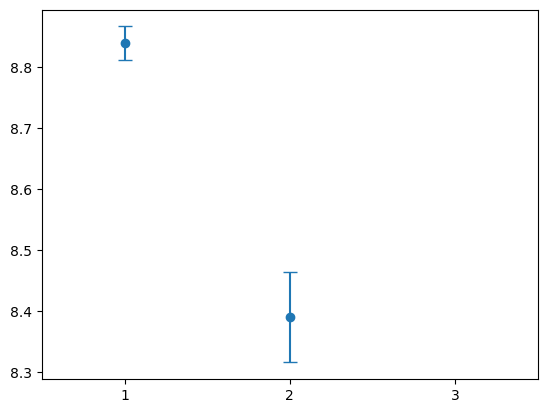

In [15]:
# Plot errorbars
fig0, ax0 = plt.subplots()
ax0.errorbar([1, 2], [Umean, np.mean(BootstrapMeans)],
             yerr = [(CIp_N - CIn_N), (CIp_B - CIn_B)],
            linestyle = '',marker = 'o',capsize = 5)
ax0.set_xlim([0.5,3.5])
ax0.set_xticks([1,2,3])
ax0.set_xticklabels(['Normal dist.','Bootstrapping'])
ax0.set_ylabel('Annual mean wind speed [m/s]')
plt.show()

C:\Users\joram\anaconda3\envs\dtu_env\Lib\site-packages\scipy\stats\_continuous_distns.py:10958: RuntimeWarning: divide by zero encountered in divide
  self._hpdf = self._hpdf / float(np.sum(self._hpdf * self._hbin_widths))
C:\Users\joram\anaconda3\envs\dtu_env\Lib\site-packages\scipy\stats\_continuous_distns.py:10958: RuntimeWarning: invalid value encountered in divide
  self._hpdf = self._hpdf / float(np.sum(self._hpdf * self._hbin_widths))


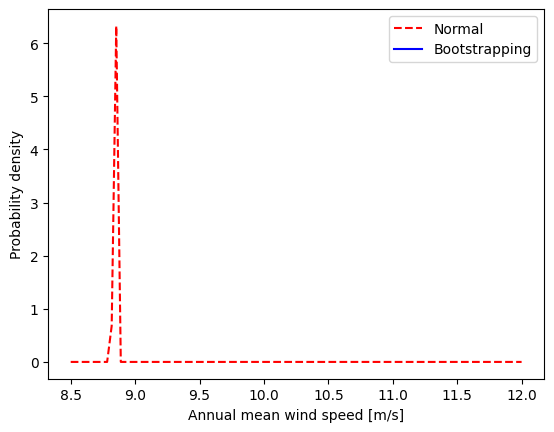

In [16]:
# Plot pdfs

Ubins = np.linspace(8.5,12,100)

pdf_N = stats.norm.pdf(Ubins,Umean,Ustd/np.sqrt(n))
dU = Ubins[1]-Ubins[0] # Scaling factor for the t-pdf to make sure we get a valid pdf for every bin spacing
pdf_T = (1/np.sqrt(dU))*stats.t.pdf((Ubins - Umean)/(Ustd/np.sqrt(n)), n - 1)

# Generating an empirical pdf from the bootstrap sample
BootstrapHist = np.histogram(BootstrapMeans,bins = Ubins)
BootstrapDist = stats.rv_histogram(BootstrapHist)
pdf_B = BootstrapDist.pdf(Ubins)

fig1, ax1 = plt.subplots()
p11 = ax1.plot(Ubins,pdf_N,'--r', label = 'Normal')
p12 = ax1.plot(Ubins,pdf_B,'-b', label = 'Bootstrapping')
plt.xlabel('Annual mean wind speed [m/s]')
plt.ylabel('Probability density')
plt.legend()

plt.show()